<a href="https://colab.research.google.com/github/Aman-Dayal/first_streamlit_app/blob/main/detector_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:

!git clone https://github.com/alexeygrigorev/clothing-dataset.git


Cloning into 'clothing-dataset'...
remote: Enumerating objects: 5792, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 5792 (delta 13), reused 3 (delta 1), pack-reused 5766
Receiving objects: 100% (5792/5792), 152.92 MiB | 22.24 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Updating files: 100% (5759/5759), done.


In [ ]:
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:


# Path to your CSV file
csv_file_path = '/content/F_annotate.csv'

# Read the CSV file
df = pd.read_csv(csv_file_path)
df['obd_path'] = df['grpd_path'].apply(lambda x : '../'+'/'.join(x.split('/')[2:]))

# Display the dataframe
display(df.head())


,Unnamed: 0,image,label,kids,org_path,grpd_path,Annotations,obd_path
0,0,4285fab0-751a-4b74-8e9b-43af05deee22,Not sure,0,./content/clothing-dataset/images/4285fab0-751...,./content/sorted_images_/Not sure/4285fab0-751...,"(96, 77, 291, 466)",../sorted_images_/Not sure/4285fab0-751a-4b74-...
1,1,ea7b6656-3f84-4eb3-9099-23e623fc1018,T-Shirt,0,./content/clothing-dataset/images/ea7b6656-3f8...,./content/sorted_images_/T-Shirt/ea7b6656-3f84...,"(84, 181, 326, 329)",../sorted_images_/T-Shirt/ea7b6656-3f84-4eb3-9...
2,2,00627a3f-0477-401c-95eb-92642cbe078d,Not sure,0,./content/clothing-dataset/images/00627a3f-047...,./content/sorted_images_/Not sure/00627a3f-047...,"(55, 57, 395, 424)",../sorted_images_/Not sure/00627a3f-0477-401c-...
3,3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,T-Shirt,0,./content/clothing-dataset/images/ea2ffd4d-9b2...,./content/sorted_images_/T-Shirt/ea2ffd4d-9b25...,"(49, 165, 375, 381)",../sorted_images_/T-Shirt/ea2ffd4d-9b25-4ca8-9...
4,4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,Shoes,0,./content/clothing-dataset/images/3b86d877-2b9...,./content/sorted_images_/Shoes/3b86d877-2b9e-4...,"(195, 94, 379, 324)",../sorted_images_/Shoes/3b86d877-2b9e-4c8b-a6a...


In [18]:
grouped_df = df.groupby('label')['image'].apply(list).reset_index()
grouped_df['count']=grouped_df['image'].apply(lambda x : len(x))
dd = {label: image for label, image in zip(grouped_df['label'], grouped_df['image'])}

In [23]:
grouped_df

,label,image,count,numerical_labels
0,Blazer,"[396cdf47-f336-491c-919c-ae80cf1d02ba, 5008492...",109,0
1,Blouse,"[4ef0dece-adfc-4036-ad34-922d607d4bd5, 28455ee...",23,1
2,Body,"[13aa07bd-cf38-4309-8dc2-daddffe43922, f4106e5...",69,2
3,Dress,"[e3c8e575-c5b8-4c4c-9f49-62b37b611b6b, e6a8b33...",357,3
4,Hat,"[a283e901-d8da-4be1-91ae-2a3c94de48a2, 54e4e91...",171,4
5,Hoodie,"[739bafaa-cce9-4322-b16c-21baac21a313, 598090c...",100,5
6,Longsleeve,"[5805e9ba-176c-461b-87f7-ff400291d0fc, 8f6822c...",699,6
7,Not sure,"[4285fab0-751a-4b74-8e9b-43af05deee22, 00627a3...",228,7
8,Other,"[8659edca-30a6-4cd2-b2f0-8c9358f2a785, 71c85a4...",67,8
9,Outwear,"[1b2ace0a-382e-4b87-8e9d-35cbcfac636b, e580170...",312,9


In [52]:
data = df.copy()
counts = data['label'].value_counts()
filtered_df = df[df['label'].isin(counts[counts > 150].index)]


In [53]:
filtered_df

,image,obd_path,label,Annotations,x,y,height,width,numerical_labels
0,4285fab0-751a-4b74-8e9b-43af05deee22,../sorted_images_/Not sure/4285fab0-751a-4b74-...,Not sure,"[96, 77, 291, 46]",96,77,291,46,7
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,../sorted_images_/T-Shirt/ea7b6656-3f84-4eb3-9...,T-Shirt,"[84, 181, 326, 32]",84,181,326,32,17
2,00627a3f-0477-401c-95eb-92642cbe078d,../sorted_images_/Not sure/00627a3f-0477-401c-...,Not sure,"[55, 57, 395, 42]",55,57,395,42,7
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,../sorted_images_/T-Shirt/ea2ffd4d-9b25-4ca8-9...,T-Shirt,"[49, 165, 375, 38]",49,165,375,38,17
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,../sorted_images_/Shoes/3b86d877-2b9e-4c8b-a6a...,Shoes,"[195, 94, 379, 32]",195,94,379,32,13
...,...,...,...,...,...,...,...,...,...
5392,3855ea22-5e7f-411f-b1fa-6db27a676c06,../sorted_images_/Shoes/3855ea22-5e7f-411f-b1f...,Shoes,"[79, 210, 372, 26]",79,210,372,26,13
5393,dfd4079d-967b-4b3e-8574-fbac11b58103,../sorted_images_/Shorts/dfd4079d-967b-4b3e-85...,Shorts,"[64, 117, 374, 28]",64,117,374,28,14
5395,5379356a-40ee-4890-b416-2336a7d84061,../sorted_images_/Shorts/5379356a-40ee-4890-b4...,Shorts,"[63, 129, 349, 26]",63,129,349,26,14
5396,65507fb8-3456-4c15-b53e-d1b03bf71a59,../sorted_images_/Shoes/65507fb8-3456-4c15-b53...,Shoes,"[116, 144, 150, 26]",116,144,150,26,13


In [64]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder to the labels and transform the labels to numerical form
df['numerical_labels'] = le.fit_transform(df['label'])


In [63]:
{i:len(j) for i,j in dd.items()}

{0: 109,
 1: 23,
 2: 69,
 3: 357,
 4: 171,
 5: 100,
 6: 699,
 7: 228,
 8: 67,
 9: 312,
 10: 692,
 11: 120,
 12: 378,
 13: 431,
 14: 308,
 15: 7,
 16: 155,
 17: 1011,
 18: 43,
 19: 118}

In [65]:
df['label'].groupby(df['numerical_labels']).value_counts()

numerical_labels  label     
0                 Blazer         109
1                 Blouse          23
2                 Body            69
3                 Dress          357
4                 Hat            171
5                 Hoodie         100
6                 Longsleeve     699
7                 Not sure       228
8                 Other           67
9                 Outwear        312
10                Pants          692
11                Polo           120
12                Shirt          378
13                Shoes          431
14                Shorts         308
15                Skip             7
16                Skirt          155
17                T-Shirt       1011
18                Top             43
19                Undershirt     118
Name: count, dtype: int64

In [24]:
dd = {label: image for label, image in zip(grouped_df['numerical_labels'], grouped_df['image'])}

In [27]:
import os
import shutil

def create_category_folders_and_move_images(src_folder,mapp, base_dst_folder):
  """
  Create folders for each category and move the corresponding images to those folders.

  :param src_folder: The path to the source folder containing images.
  :param category_dict: A dictionary with category names as keys and lists of image filenames as values.
  :param base_dst_folder: The base destination folder where category folders will be created.
  """
  # Ensure the base destination folder exists
  nf = []
  if not os.path.exists(base_dst_folder):
      os.makedirs(base_dst_folder)
  for category, image_list in mapp.items():
      category_folder = os.path.join(base_dst_folder, str(category))
      if not os.path.exists(category_folder):
          os.makedirs(category_folder)
      for image_name in image_list:
          image_name = f'{image_name}.jpg'
          src_file_path = os.path.join(src_folder, image_name)
          dst_file_path = os.path.join(category_folder, image_name)
          if os.path.exists(src_file_path):
              shutil.copy(src_file_path, dst_file_path)
          else:
              nf.append(src_file_path)
              print('not happnening',src_file_path)
          # print(f"File {image_name} not found in source folder: {src_folder}")
  return nf

# Example usage
src_folder = '/content/clothing-dataset/images'
base_dst_folder = '/content/sorted_images_'

# Example dictionary with category names and image filenames
# category_dict = dd

notfound = create_category_folders_and_move_images(src_folder, dd, base_dst_folder)


In [86]:

df

,image,obd_path,label,Annotations,x,y,height,width,numerical_labels,colab_path
0,4285fab0-751a-4b74-8e9b-43af05deee22,../sorted_images_/Not sure/4285fab0-751a-4b74-...,Not sure,"[96, 77, 291, 46]",96,77,291,46,7,/content/sorted_images_/7/4285fab0-751a-4b74-8...
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,../sorted_images_/T-Shirt/ea7b6656-3f84-4eb3-9...,T-Shirt,"[84, 181, 326, 32]",84,181,326,32,17,/content/sorted_images_/17/ea7b6656-3f84-4eb3-...
2,00627a3f-0477-401c-95eb-92642cbe078d,../sorted_images_/Not sure/00627a3f-0477-401c-...,Not sure,"[55, 57, 395, 42]",55,57,395,42,7,/content/sorted_images_/7/00627a3f-0477-401c-9...
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,../sorted_images_/T-Shirt/ea2ffd4d-9b25-4ca8-9...,T-Shirt,"[49, 165, 375, 38]",49,165,375,38,17,/content/sorted_images_/17/ea2ffd4d-9b25-4ca8-...
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,../sorted_images_/Shoes/3b86d877-2b9e-4c8b-a6a...,Shoes,"[195, 94, 379, 32]",195,94,379,32,13,/content/sorted_images_/13/3b86d877-2b9e-4c8b-...
...,...,...,...,...,...,...,...,...,...,...
5393,dfd4079d-967b-4b3e-8574-fbac11b58103,../sorted_images_/Shorts/dfd4079d-967b-4b3e-85...,Shorts,"[64, 117, 374, 28]",64,117,374,28,14,/content/sorted_images_/14/dfd4079d-967b-4b3e-...
5394,befa14be-8140-4faf-8061-1039947e329d,../sorted_images_/Body/befa14be-8140-4faf-8061...,Body,"[102, 66, 348, 51]",102,66,348,51,2,/content/sorted_images_/2/befa14be-8140-4faf-8...
5395,5379356a-40ee-4890-b416-2336a7d84061,../sorted_images_/Shorts/5379356a-40ee-4890-b4...,Shorts,"[63, 129, 349, 26]",63,129,349,26,14,/content/sorted_images_/14/5379356a-40ee-4890-...
5396,65507fb8-3456-4c15-b53e-d1b03bf71a59,../sorted_images_/Shoes/65507fb8-3456-4c15-b53...,Shoes,"[116, 144, 150, 26]",116,144,150,26,13,/content/sorted_images_/13/65507fb8-3456-4c15-...


In [85]:
df['colab_path'] = df[['numerical_labels','image']].apply(lambda row : '/content/sorted_images_/'+str(row['numerical_labels'])+'/'+row['image']+'.jpg', axis=1)
# 'sorted_images_'+df['numerical_labels']+df['image']+'.jpg'

In [ ]:
df['label'].groupby(df['label']).agg('count')

label
Blazer         109
Blouse          23
Body            69
Dress          357
Hat            171
Hoodie         100
Longsleeve     699
Not sure       228
Other           67
Outwear        312
Pants          692
Polo           120
Shirt          378
Shoes          431
Shorts         308
Skip             7
Skirt          155
T-Shirt       1011
Top             43
Undershirt     118
Name: label, dtype: int64

In [66]:
# image_files = df['obd_path'].tolist()
# bounding_boxes = df[['Annotations']].values.tolist()

# images_and_boxes = [(image_file, boxes) for image_file, boxes in zip(image_files, bounding_boxes)]

In [88]:
annotations = df[['image','colab_path','label','Annotations','numerical_labels']]

In [89]:

annotations.Annotations[0]

[96, 77, 291, 46]

In [90]:
# annotations.loc[:,'Annotations'] = annotations.Annotations.apply(lambda x : list(map(int,x[1:-2].strip().split(','))))

In [91]:
annotations.loc[:,'x'] = annotations.Annotations.apply(lambda x : x[0])
annotations.loc[:,'y'] = annotations.Annotations.apply(lambda x : x[1])
annotations.loc[:,'height'] = annotations.Annotations.apply(lambda x : x[2])
annotations.loc[:,'width'] = annotations.Annotations.apply(lambda x : x[3])

<ipython-input-91-df010afe0616>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annotations.loc[:,'x'] = annotations.Annotations.apply(lambda x : x[0])
<ipython-input-91-df010afe0616>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annotations.loc[:,'y'] = annotations.Annotations.apply(lambda x : x[1])
<ipython-input-91-df010afe0616>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [92]:
annotations.head()

,image,colab_path,label,Annotations,numerical_labels,x,y,height,width
0,4285fab0-751a-4b74-8e9b-43af05deee22,/content/sorted_images_/7/4285fab0-751a-4b74-8...,Not sure,"[96, 77, 291, 46]",7,96,77,291,46
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,/content/sorted_images_/17/ea7b6656-3f84-4eb3-...,T-Shirt,"[84, 181, 326, 32]",17,84,181,326,32
2,00627a3f-0477-401c-95eb-92642cbe078d,/content/sorted_images_/7/00627a3f-0477-401c-9...,Not sure,"[55, 57, 395, 42]",7,55,57,395,42
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,/content/sorted_images_/17/ea2ffd4d-9b25-4ca8-...,T-Shirt,"[49, 165, 375, 38]",17,49,165,375,38
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,/content/sorted_images_/13/3b86d877-2b9e-4c8b-...,Shoes,"[195, 94, 379, 32]",13,195,94,379,32


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [108]:

annotations

,image,colab_path,label,Annotations,numerical_labels,x,y,height,width
0,4285fab0-751a-4b74-8e9b-43af05deee22,/content/sorted_images_/7/4285fab0-751a-4b74-8...,Not sure,"[96, 77, 291, 46]",7,96,77,291,46
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,/content/sorted_images_/17/ea7b6656-3f84-4eb3-...,T-Shirt,"[84, 181, 326, 32]",17,84,181,326,32
2,00627a3f-0477-401c-95eb-92642cbe078d,/content/sorted_images_/7/00627a3f-0477-401c-9...,Not sure,"[55, 57, 395, 42]",7,55,57,395,42
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,/content/sorted_images_/17/ea2ffd4d-9b25-4ca8-...,T-Shirt,"[49, 165, 375, 38]",17,49,165,375,38
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,/content/sorted_images_/13/3b86d877-2b9e-4c8b-...,Shoes,"[195, 94, 379, 32]",13,195,94,379,32
...,...,...,...,...,...,...,...,...,...
5393,dfd4079d-967b-4b3e-8574-fbac11b58103,/content/sorted_images_/14/dfd4079d-967b-4b3e-...,Shorts,"[64, 117, 374, 28]",14,64,117,374,28
5394,befa14be-8140-4faf-8061-1039947e329d,/content/sorted_images_/2/befa14be-8140-4faf-8...,Body,"[102, 66, 348, 51]",2,102,66,348,51
5395,5379356a-40ee-4890-b416-2336a7d84061,/content/sorted_images_/14/5379356a-40ee-4890-...,Shorts,"[63, 129, 349, 26]",14,63,129,349,26
5396,65507fb8-3456-4c15-b53e-d1b03bf71a59,/content/sorted_images_/13/65507fb8-3456-4c15-...,Shoes,"[116, 144, 150, 26]",13,116,144,150,26


In [112]:
import pandas as pd
import tensorflow as tf

# Load the CSV data
# df = pd.read_csv('annotations.csv')
ndf = annotations.copy()
# Get the image paths, labels, and annotations
image_paths = ndf['colab_path'].values
labels = ndf['numerical_labels'].values
annotations_ls = ndf[['x', 'y', 'height', 'width']].values  # Get the annotations as a 2D array

# Create a dataset of image paths, labels, and annotations
path_ds = tf.data.Dataset.from_tensor_slices(image_paths)
label_ds = tf.data.Dataset.from_tensor_slices(labels)
annotation_ds = tf.data.Dataset.from_tensor_slices(annotations_ls)

# Function to load and preprocess each image
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [255, 255])
    image /= 255  # normalize pixel values
    return image

# Map the load_and_preprocess_image function to each image file
image_ds = path_ds.map(load_and_preprocess_image)

# Combine the datasets
dataset = tf.data.Dataset.zip((image_ds, label_ds, annotation_ds))


In [113]:
# Determine the number of total elements
num_elements = tf.data.experimental.cardinality(dataset).numpy()

# Determine the number of elements for the training set (e.g., 80% of the dataset)
num_train_elements = int(num_elements * 0.8)

# Create the training set
train_dataset = dataset.take(num_train_elements)

# Create the test set
test_dataset = dataset.skip(num_train_elements)


In [125]:
train_dataset


<_TakeDataset element_spec=(TensorSpec(shape=(255, 255, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None), TensorSpec(shape=(4,), dtype=tf.int64, name=None))>

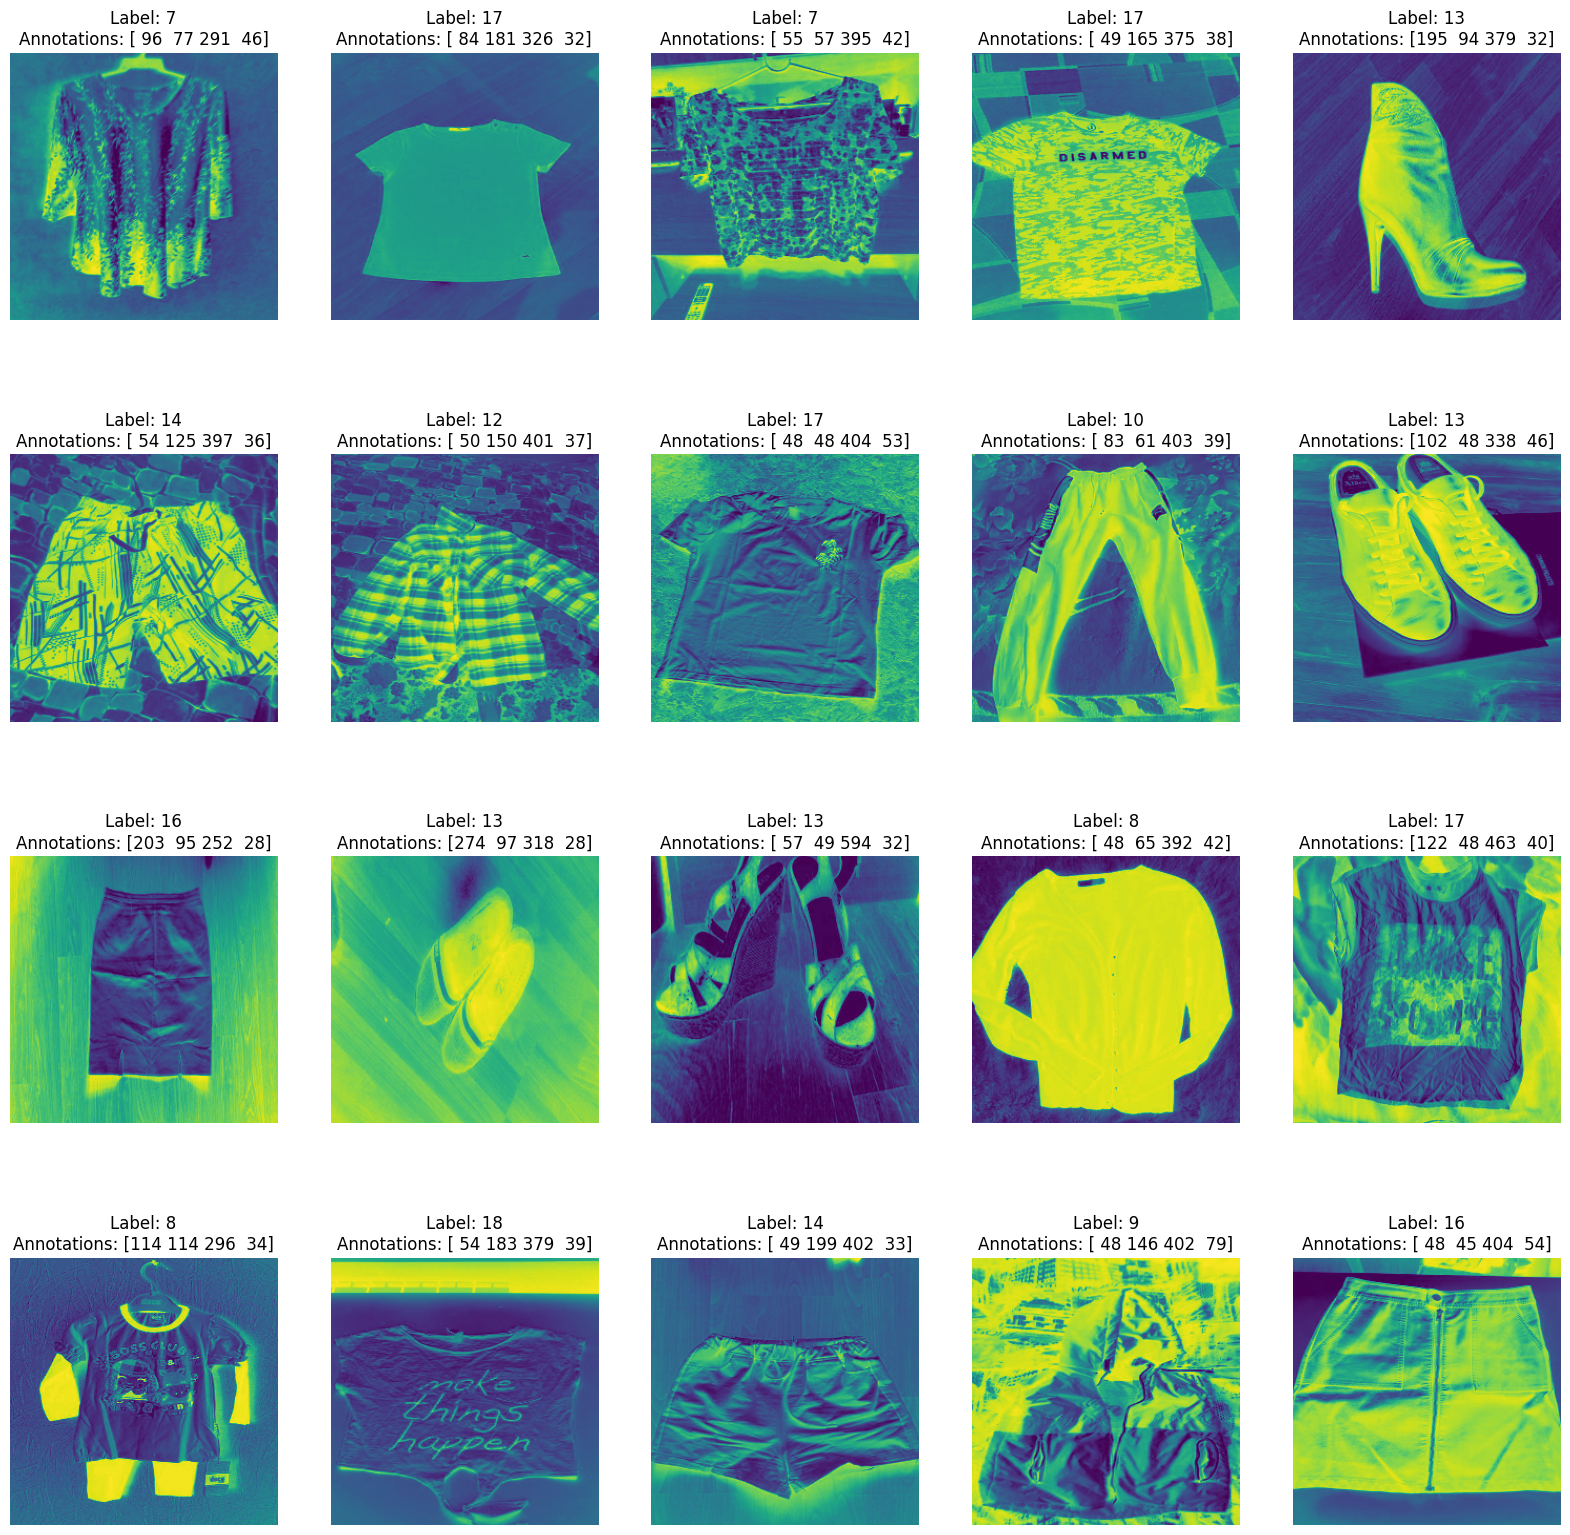

In [130]:

# Function to sharpen the image
def sharpen_image(image):
    # Define the sharpening kernel
    kernel = tf.constant([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]], dtype=tf.float32)
    kernel = tf.expand_dims(kernel, axis=-1)
    kernel = tf.expand_dims(kernel, axis=-1)

    # Apply the kernel to each channel separately
    image = tf.expand_dims(image, axis=3)  # Add batch dimension
    # image = tf.nn.depthwise_conv2d(image, kernel, strides=[1, 1, 1, 1], padding='SAME')
    image = tf.squeeze(image, axis=3)  # Remove batch dimension
    return image

# Function to equalize the image
def equalize_image(image):
    # Convert image to float32 for equalization
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Adjust contrast to equalize
    image = tf.image.adjust_contrast(image, -100)
    return image
def preprocess_image(image, label, annotation):

    image = tf.image.adjust_saturation(image, -100)
    image = equalize_image(image)
    image = tf.image.adjust_hue(image, 0.1)
    image = sharpen_image(image)
    image = tf.image.rgb_to_grayscale(image)
    # image = tf.image.random_jpeg_quality(image, min_jpeg_quality=80, max_jpeg_quality=100)
    return image, label, annotation
train_ds_pp = train_dataset.shuffle(buffer_size=1000)
train_ds_pp = train_dataset.map(preprocess_image)

test_ds_pp = test_dataset.map(preprocess_image)
# Create a figure for the subplots
plt.figure(figsize=(20, 20))

# Loop over the images
for i, (i2, l2, a2) in enumerate(train_ds_pp.take(20)):
    # Create a subplot for each image
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(i2.numpy())
    # print(i2.shape)
    plt.title(f"Label: {l2.numpy()}\nAnnotations: {a2}")
    plt.axis("off")
    # break


# Display the plot
plt.show()


In [131]:
train_ds_pp

<_MapDataset element_spec=(TensorSpec(shape=(255, 255, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None), TensorSpec(shape=(4,), dtype=tf.int64, name=None))>

In [117]:
# # this is the code for my attachment


# # Function to sharpen the image
# def sharpen_image(image):
#     # Define the sharpening kernel
#     kernel = tf.constant([[0, -1, 0],
#                           [-1, 6, -1],
#                           [0, -1, 0]], dtype=tf.float32)
#     kernel = tf.expand_dims(kernel, axis=-1)
#     kernel = tf.expand_dims(kernel, axis=-1)

#     # Apply the kernel to each channel separately
#     image = tf.expand_dims(image, axis=3)  # Add batch dimension
#     # image = tf.nn.depthwise_conv2d(image, kernel, strides=[1, 1, 1, 1], padding='SAME')
#     image = tf.squeeze(image, axis=3)  # Remove batch dimension
#     return image

# # Function to equalize the image
# def equalize_image(image):
#     # Convert image to float32 for equalization
#     image = tf.image.convert_image_dtype(image, tf.float32)
#     # Adjust contrast to equalize
#     image = tf.image.adjust_contrast(image, 10.0)
#     return image


# import tensorflow as tf
# # import keras_cv

# def preprocess_image(image, label, annotation):
#     image = tf.image.adjust_saturation(image, -10)
#     image = equalize_image(image)
#     image = sharpen_image(image)
#     image = tf.image.adjust_hue(image, 0.1)
#     image = tf.image.rgb_to_grayscale(image)

#     image = tf.image.random_jpeg_quality(image, min_jpeg_quality=80, max_jpeg_quality=100)
#     return image, label, annotation
# # for i, l, a in dataset.take(5):
# #     print('before')
# #     print("Label: ", l.numpy())
# #     print("Annotations: ", a)
# #     plt.imshow(i)
# #     plt.show()
# dataset1 = dataset.shuffle(buffer_size=1000)

# dataset2 = dataset1.map(preprocess_image)

# # Create a figure for the subplots
# plt.figure(figsize=(20, 20))

# # Loop over the images
# for i, (i2, l2, a2) in enumerate(train_dataset.take(20)):
#     # Create a subplot for each image
#     ax = plt.subplot(4, 5, i + 1)
#     plt.imshow(i2.numpy())
#     plt.title(f"Label: {l2.numpy()}\nAnnotations: {a2}")
#     plt.axis("off")
#     # break


# # Display the plot
# plt.show()

In [121]:
# normalization_layer = tf.keras.layers.Rescaling(1./255)

# # normalized_ds = train_dataset.map(lambda x, y, z: (normalization_layer(x), y, z))
# image_batch, labels_batch, annotations_batch = next(iter(train_dataset))
# first_image = image_batch[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))

In [132]:
num_classes = 10

model = tf.keras.Sequential([
  # tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  # tf.keras.layers.Conv2D(32, 3, activation='relu'),
  # tf.keras.layers.MaxPooling2D(),
  # tf.keras.layers.Conv2D(32, 3, activation='relu'),
  # tf.keras.layers.MaxPooling2D(),
  # tf.keras.layers.Flatten(),
  # tf.keras.layers.Dense(128, activation='relu'),
  # tf.keras.layers.Dense(num_classes)
])

In [133]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [136]:
tf.debugging.disable_traceback_filtering()

model.fit(
  train_ds_pp,
  validation_data=test_ds_pp,
  epochs=5
)


Epoch 1/5


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/distribute/distribute_lib.py", line 1681, in run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/distribute/distribute_lib.py", line 3271, in call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/distribute/distribute_lib.py", line 4069, in _call_for_each_replica
        return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 61, in error_handler
        return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__
        return super().__call__(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 61, in error_handler
        return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__
        outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 155, in error_handler
        raise new_e.with_traceback(e.__traceback__) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
        return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 413, in call  **
        outputs = layer(inputs, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 61, in error_handler
        return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1116, in __call__
        input_spec.assert_input_compatibility(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "conv2d_1" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (255, 255, 1)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(255, 255, 1), dtype=float32)
      • training=True
      • mask=None
